# Predicting Housing Prices Using Linear Regression (Considering a Linear Dataset)

## Modules Required

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import preprocessing,model_selection 
from sklearn.linear_model import LinearRegression 
from statistics import mean 
from matplotlib import style 
import random

## For styling Matplotlib graphs(Optional)

In [2]:
style.use('fivethirtyeight')

## Loading Dataset Using Pandas Dataframe Library

In [3]:
df = pd.read_csv('Sample dataset.csv')
df.head()

,x_values,y_values
0,1,7
1,3,20
2,4,17
3,7,38
4,2,20


In [4]:
df.tail()

,x_values,y_values
45,76,324
46,89,566
47,70,435
48,99,567
49,33,169


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
x_values    50 non-null int64
y_values    50 non-null int64
dtypes: int64(2)
memory usage: 880.0 bytes


## Checking for NULL values in the dataset

In [6]:
df.isnull().values.any()

False

## Checking for Correlation in our dataset

In [7]:
df.corr()

,x_values,y_values
x_values,1.00000,0.95079
y_values,0.95079,1.00000


## Visualizing Correlation of columns (Used in Data Analysis for checking Redundant columns in a dataset)

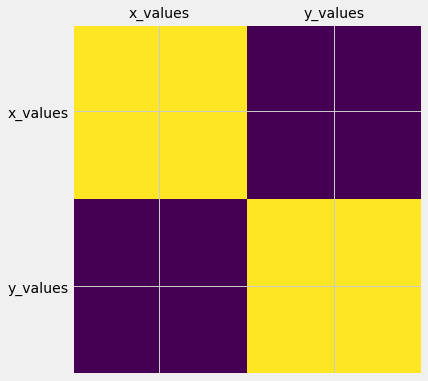

In [8]:
def plot_corr(df):
    corr = df.corr()
    fig,ax = plt.subplots(figsize = (6,6))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    
    
plot_corr(df) 

## Coverting the dataframe into numpy arrays 

In [9]:
x = np.array(df.drop(['y_values'],1))  # input values or x-values
y = np.array(df['y_values'])           # output values or y_values

## Splitting the data into training and testing dataset using sklearn 

In [10]:
x_train ,x_test , y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.3)    #Splits data into 70:30 ratio

## Using the Linear Regression Model 

In [11]:
regr = LinearRegression() # calling the Linear Regression class

## Training our Model

In [12]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Testing Validation on the testing data (Checking how well it learned )

### -- Specially used for Checking Overfitting and Underfitting 

In [13]:
print("Validation Score = {} %".format(regr.score(x_test, y_test)*100))

Validation Score = 95.00472178509945 %


## Predicting y values i.e ( y_pred : Predicted by model ) from our testing data ( x_test ) and compare this with y_test ( original y values )

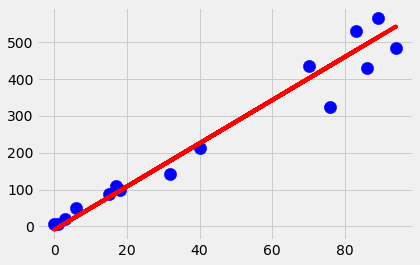

In [14]:
y_pred = regr.predict(x_test)     # predicts y for each x_test
plt.scatter(x_test, y_test,s = 150,color ='b') 
plt.plot(x_test, y_pred, color ='r') 
plt.show() 

In [15]:
## Now that the dataset is linear , u can predict for new x values 

In [16]:
def to_np_arrays(x):           ## Function that converts input values to numpy arrays
    p = np.array(x)
    p.shape = (len(x),1)
    return p

new_x = [80,56,75]             ## Your input values for which ur model will predict
X_new = to_np_arrays(new_x)    ## Input values converted to numpy arrays which is ready for predicting

## Predicting from our new input values 

In [17]:
Y_pred = regr.predict(X_new)
print(Y_pred)

[459.66552884 319.15751336 430.39302561]


## Visualizing Prediction

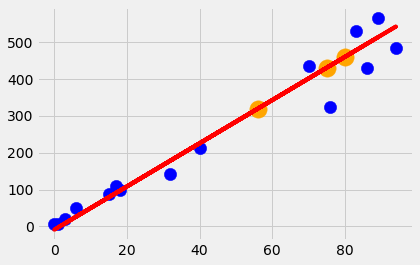

In [18]:
plt.scatter(x_test, y_test, s =150 ,color ='b') 
plt.plot(x_test, y_pred,color ='r')
plt.scatter(X_new,Y_pred,s =300, color = 'orange')
plt.show() 

In [19]:
## The Orange point is what it predicted and it seems valid I guess 